In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

In [6]:
# 1. 读取数据
data_trian = pd.read_csv('./data/train.csv')
data_test_a = pd.read_csv('./data/testA.csv')

In [7]:
#2. 总体了解数据
data_trian.shape

(800000, 47)

In [8]:
data_test_a.shape

(200000, 46)

In [9]:
data_trian.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [10]:
data_trian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [11]:
data_trian.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [12]:
data_trian.head(3).append(data_trian.tail(3))

/tmp/ipykernel_72313/2001044546.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trian.head(3).append(data_trian.tail(3))


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [13]:
# 3. 查看缺失值、唯一值
# 注：lgb 可以自动处理缺失值
# 目的： 主要是查看nan存在的个数是否针对很大，如果nan存在过多的话就说明这一列对label的影响几乎可以忽略不计，可以考虑删掉，但缺失值多少的话，我们可以选择不同的策略进行天才
# 另外，如果某条记录大部分的列都是缺失的且样本充足的情况下可以考虑删除
data_trian.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

In [14]:
data_trian.isnull().any().sum()

22

In [15]:
# 4. 查看缺失值特征中缺失率大于50%的特征
have_null_fea_dict = (data_trian.isnull().sum()/len(data_trian)).to_dict()
fea_null_moreHalf = {}
for key, value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreHalf[key] = value


fea_null_moreHalf

{}

<Axes: >

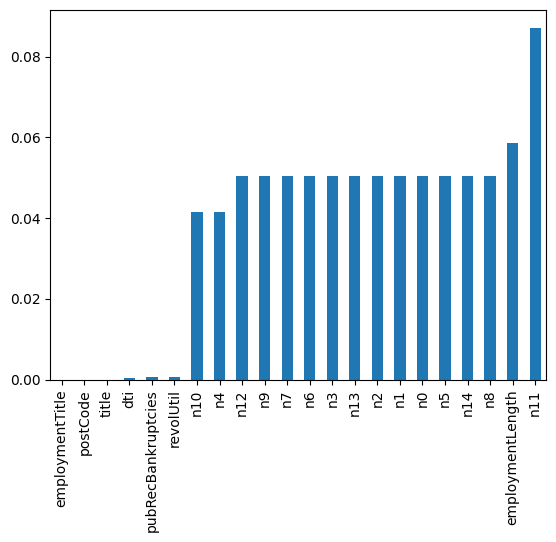

In [16]:
# 具体查看缺失特征及缺失率

missing = data_trian.isnull().sum() / len(data_trian)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [17]:
# 查看并删除唯一值=1的列
one_value_fea = [col for col in data_trian.columns if data_trian[col].nunique() <= 1]
one_value_fea

['policyCode']

In [18]:
data_trian.drop(['policyCode'], axis=1, inplace=True)
data_test_a.drop(['policyCode'], axis=1, inplace=True)

## 查看数值特征和对象类型特征

In [19]:
number_fel = list(data_trian.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in number_fel, list(data_trian.columns)))

In [20]:
number_fel

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [21]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [22]:
data_trian['grade']

0         E
1         D
2         D
3         A
4         C
         ..
799995    C
799996    A
799997    C
799998    A
799999    B
Name: grade, Length: 800000, dtype: object

### 数值变量分析：数值型变量包含连续型和离散型


In [23]:
# 划分连续型变量和离散型变量
def get_numerical_serious_fea(data, feas):
    numerical_serious_fea = []
    numerical_noserious_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserious_fea.append(fea)
            continue
        else:
            numerical_serious_fea.append(fea)
    return numerical_serious_fea, numerical_noserious_fea

numerical_serious_fea, numerical_noserious_fea = get_numerical_serious_fea(data_trian, number_fel)

In [24]:
numerical_noserious_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'n11',
 'n12']

In [25]:
numerical_serious_fea, numerical_noserious_fea = get_numerical_serious_fea(data_trian, number_fel)


In [31]:
numerical_serious_fea.remove('id')
numerical_serious_fea

['loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [26]:
data_trian['term'].value_counts()

3    606902
5    193098
Name: term, dtype: int64

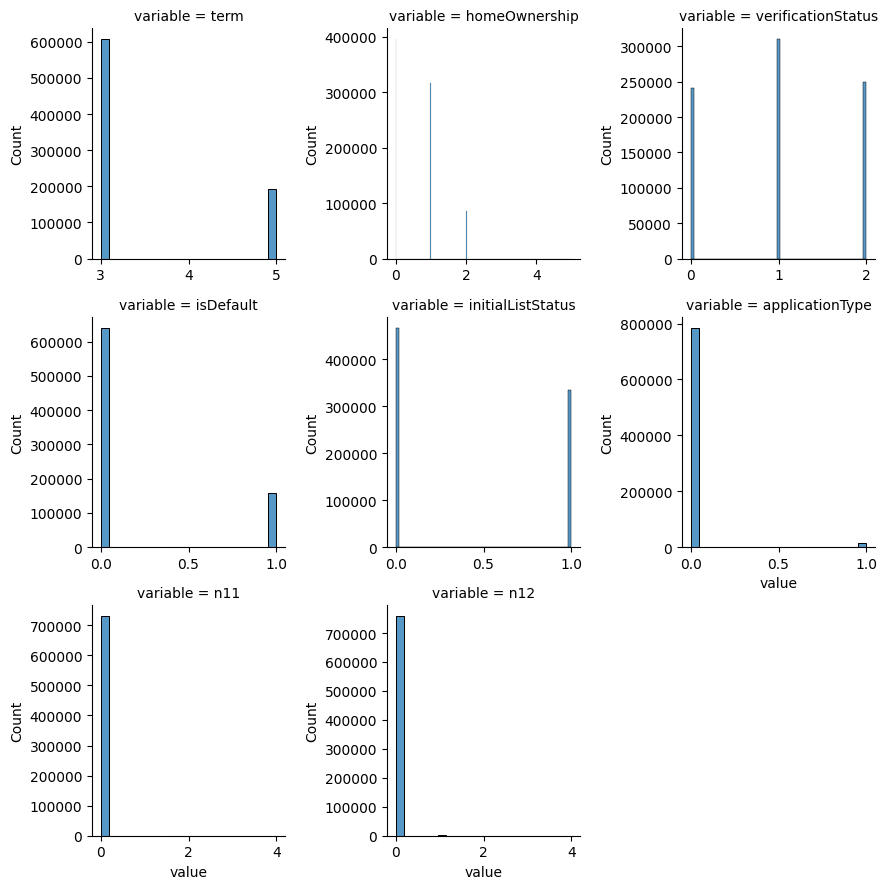

In [27]:
# 查看离散型数据分布
f = pd.melt(data_trian, value_vars=numerical_noserious_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value")

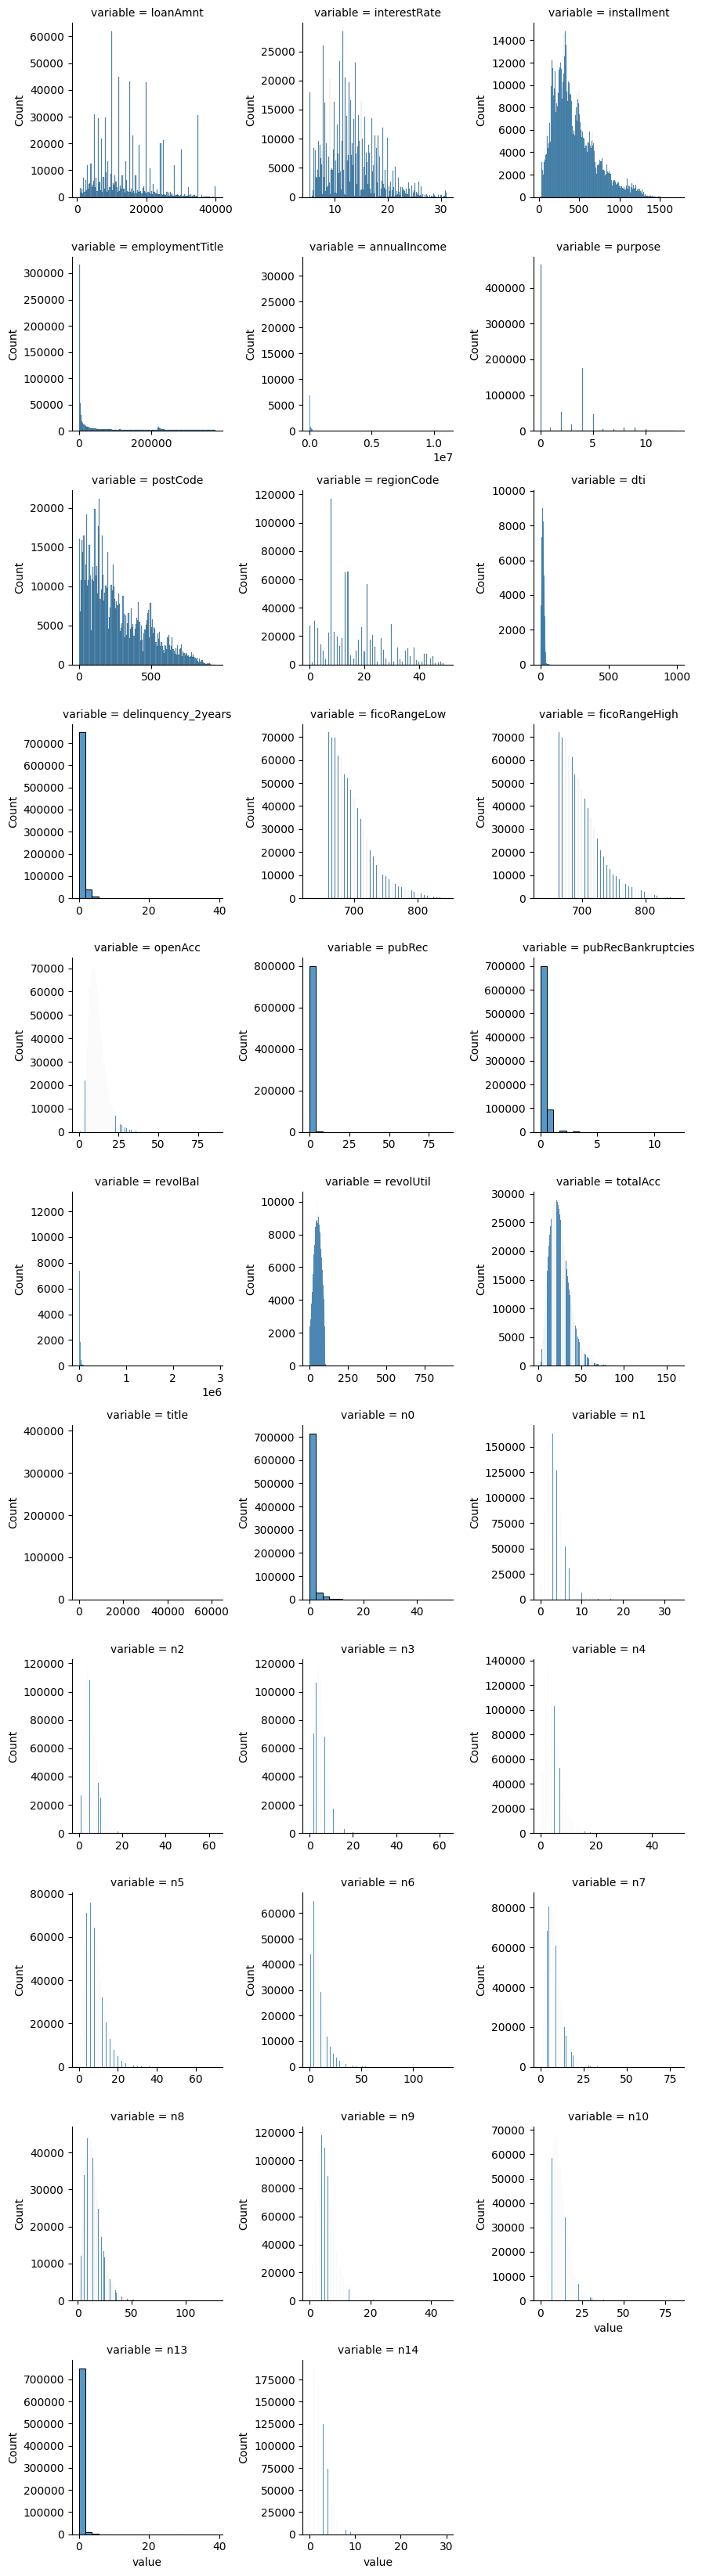

In [32]:
# 查看连续型数据分布 运行约16分钟
f2 = pd.melt(data_trian, value_vars=numerical_serious_fea)
g2 = sns.FacetGrid(f2, col="variable", col_wrap=3, sharex=False, sharey=False)
g2 = g2.map(sns.histplot, "value")

In [34]:
data_trian['title'].value_counts()

0.0        393334
4.0        148211
5.0         44748
6.0         39742
3.0         14432
            ...  
59059.0         1
53052.0         1
42638.0         1
28481.0         1
33369.0         1
Name: title, Length: 39644, dtype: int64

* 查看某一数值型变量的分布，查看是否符合正太分布。如果不符合的话就log一下看看
* 正太化的原因：一些情况下，正太话数据可以使得模型收敛的更快一些。一些基于距离的模型是要求要正则化的，如：KNN、GMM但一些基于树结构的模型就不需要，如：随机森林、xgboost、lightGBM等
* 只要不是过于偏态就可。

# 变量分布可视化

### 单一变量可视化

In [43]:
plt.figure(figsize=(8, 8))
sns.barplot(data_trian["employmentLength"].value_counts(dropna=False)[:20],
            data_trian["employmentLength"].value_counts(dropna=False).keys()[:20])
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 800x800 with 0 Axes>

In [42]:
dict(data_trian["employmentLength"].value_counts())

{'10+ years': 262753,
 '2 years': 72358,
 '< 1 year': 64237,
 '3 years': 64152,
 '1 year': 52489,
 '5 years': 50102,
 '4 years': 47985,
 '6 years': 37254,
 '8 years': 36192,
 '7 years': 35407,
 '9 years': 30272}

Text(0, 0.5, 'Probability')

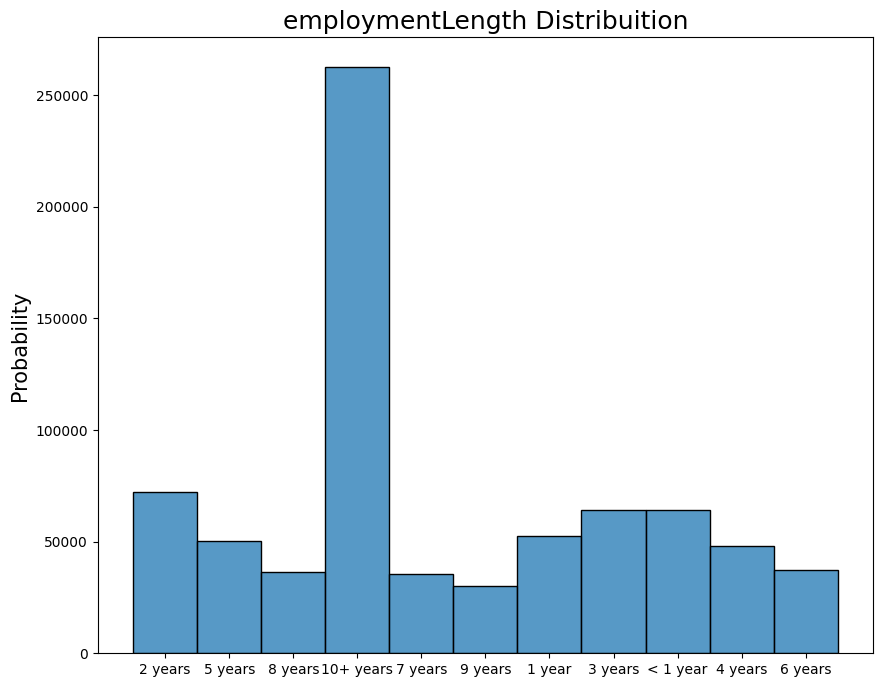

In [59]:
plt.figure(figsize=(10,8))
sub_plot_1 = sns.histplot(data_trian["employmentLength"])
sub_plot_1.set_title("employmentLength Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

Text(0.5, 1.0, 'Distribution of issueDateDT dates')

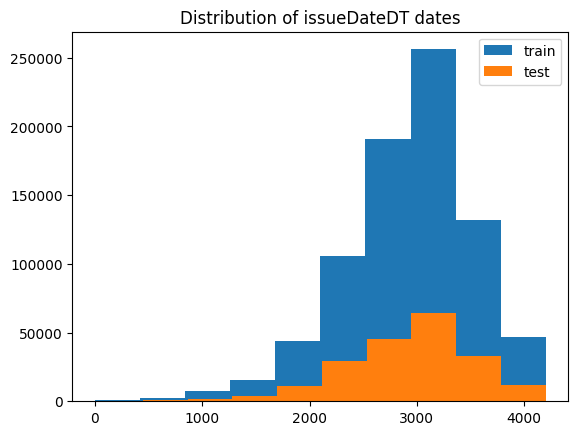

In [60]:
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
data_trian['issueDate'] = pd.to_datetime(data_trian['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_trian['issueDateDT'] = data_trian['issueDate'].apply(lambda x: x-startdate).dt.days
#转化成时间格式
data_test_a['issueDate'] = pd.to_datetime(data_trian['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_test_a['issueDateDT'] = data_test_a['issueDate'].apply(lambda x: x-startdate).dt.days
plt.hist(data_trian['issueDateDT'], label='train')
plt.hist(data_test_a['issueDateDT'], label='test')
plt.legend()
plt.title('Distribution of issueDateDT dates')


## train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的
